In [1]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [2]:
df.fillna('NN',inplace=True)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [3]:
# 대륙간 국가 개수, 대륙간 국가가 몇개 존재하는지 출력하시오
df.columns 

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [4]:
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
NN    23
OC    16
SA    12
Name: count, dtype: int64

In [5]:
# 대륙간 맥주 소비량을 출력하시오
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
NN    3345
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [6]:
# AF 대륙의 국가 출력, 맥주 소비량 출력
df[df['continent'] == "AF"]   # AF에 해당하는 국가 출력
df[df['continent']=='AF'][['country','beer_servings','continent']]

,country,beer_servings,continent
2,Algeria,25,AF
4,Angola,217,AF
18,Benin,34,AF
22,Botswana,173,AF
26,Burkina Faso,25,AF
27,Burundi,88,AF
28,Cote d'Ivoire,37,AF
29,Cabo Verde,144,AF
31,Cameroon,147,AF
33,Central African Republic,17,AF


In [7]:
# 대륙별 평균 wine_servings 출력
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
NN     24.521739
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [8]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [9]:
# 두 데이터 간 상관관계를 보여줌 
# :  beer의 판매량이 올라감에 따라 wine의 판매량은 어떻게 변하는지 알아볼 수 있음
df[['beer_servings','wine_servings']].corr(method='pearson')

# 1에 가까운 값일 수록 양의 상관관계가 있다
# -1에 가까운 값일 수록 음의 상관관계가 있다
# 0에 가까운 값일 수록 양의 상관관계가 없다

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [10]:
df[['beer_servings','spirit_servings']].corr(method='pearson')

,beer_servings,spirit_servings
beer_servings,1.000000,0.458819
spirit_servings,0.458819,1.000000


In [11]:
df[['wine_servings','spirit_servings']].corr(method='pearson')

,wine_servings,spirit_servings
wine_servings,1.000000,0.194797
spirit_servings,0.194797,1.000000


In [12]:
# 4개 모두 다 상관관계 행렬구현
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

# 결과값을 보니 딱히~ 관련이 없다^^

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [13]:
# 대륙별 맥주소비량, 평균,최소,최대,합계 구하기
# 와인 , spirit 다
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
df.groupby('continent')[cols].agg(['mean','min','max','sum'])


# 맥주소비량이 가장 높은 대륙은?
df.groupby('continent')['beer_servings'].sum().idxmax()
x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values


<BarContainer object of 6 artists>

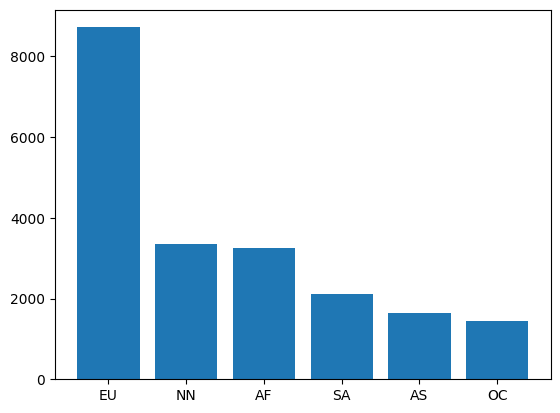

In [14]:
# 막대그래프 대륙별 맥주소비량을 그래프로 구현하시오
import matplotlib.pyplot as plt

x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values

plt.bar(x,y)


<BarContainer object of 2 artists>

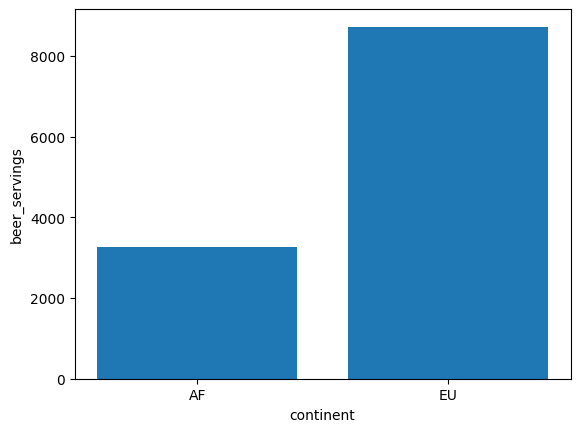

In [29]:
# AF,EU 맥주 소비량
x = ['AF','EU']
y = [df[df['continent'] == 'AF']['beer_servings'].sum(), df[df['continent'] == 'EU']['beer_servings'].sum()]

plt.xlabel('continent')
plt.ylabel('beer_servings')
plt.bar(x,y)


In [32]:
# 컬럼의 모든 술의 총량을 출력하시오
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']

# df.drop(columns='total',inplace=True)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


<BarContainer object of 6 artists>

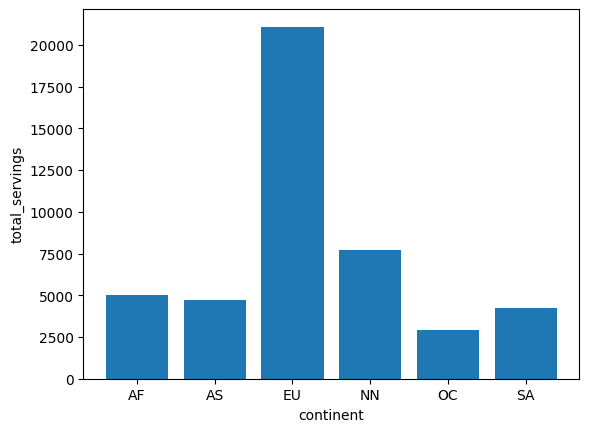

In [37]:
x = df.groupby('continent')['total_servings'].sum().index
y = df.groupby('continent')['total_servings'].sum().values

plt.xlabel('continent')
plt.ylabel('total_servings')
plt.bar(x,y)

In [49]:
# 술 소비량 대비 알콜 비율이 어느정도 함유되어 있는지 출력하시오
df['alcohol_rate'] = round(df['total_litres_of_pure_alcohol']/df['total_servings'],2)
df
df.fillna(0,inplace=True)  # NaN값은 0으로 취환

# 나라별로 역순정렬(alcohol_rate가 높은 순) 상위 20개국을 출력하시오
df.sort_values('alcohol_rate',ascending=False)[['country','alcohol_rate']].head(20)

,country,alcohol_rate
63,Gambia,0.27
153,Sierra Leone,0.22
124,Nigeria,0.19
142,Rwanda,0.15
179,Uganda,0.15
183,Tanzania,0.13
26,Burkina Faso,0.11
104,Mali,0.09
33,Central African Republic,0.09
28,Cote d'Ivoire,0.09


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


<BarContainer object of 20 artists>

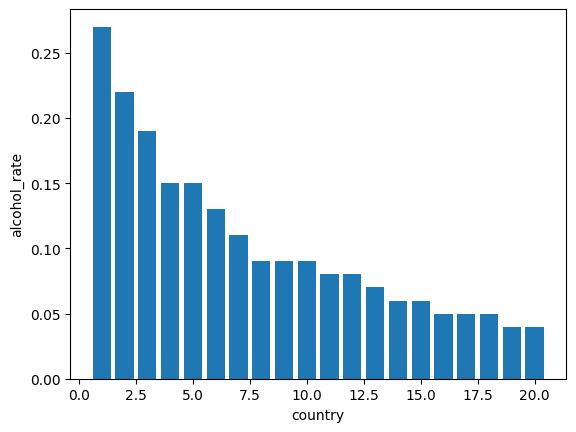

In [68]:
# alcohol 섭취량 Top 20 국가 출력

import matplotlib.pyplot as plt

df_country = list(df.sort_values('alcohol_rate',ascending=False)[['country','alcohol_rate']].head(20)['country'])
df_alcohol_rate = list(df.sort_values('alcohol_rate',ascending=False)[['country','alcohol_rate']].head(20)['alcohol_rate'])

df_country = [i+1 for i in range(len(df_country))]
print(df_country)
plt.xlabel('country')
plt.ylabel('alcohol_rate')
plt.bar(df_country,df_alcohol_rate)